# DBSCAN in scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.cluster
import sklearn.datasets
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

## DBSCAN is not entirely deterministic

Border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data are processed. For most data sets and domains, this situation does not arise often and has little impact on the clustering result: both on core points and noise points, DBSCAN is deterministic.

In [2]:
model = sklearn.cluster.DBSCAN(eps=2.5, min_samples=4)

### Example #1: the initial array of points

Cluster #0
[(1, 1), (1, 3), (1, 5), (3, 3)]

Cluster #1
[(5, 1), (5, 3), (5, 5)]



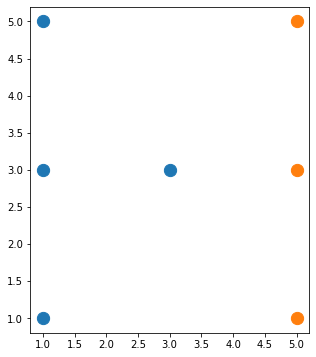

In [3]:
data_1 = np.array([(1, 1), (1, 3), (1, 5), (3, 3), (5, 1), (5, 3), (5, 5)])

result = model.fit_predict(data_1)
clusters = np.unique(result)

plt.rcParams["figure.figsize"] = (5, 6)

for cluster in clusters:
    cluster_indexes = np.where(result == cluster)
    print(f'Cluster #{cluster}')
    print([(x, y) for x, y in data_1[cluster_indexes]])
    print()
    plt.scatter(data_1[cluster_indexes, 0], data_1[cluster_indexes, 1], s=150)

plt.show()

### Example #2: processing the points in reverse order

Cluster #0
[(5, 5), (5, 3), (5, 1), (3, 3)]

Cluster #1
[(1, 5), (1, 3), (1, 1)]



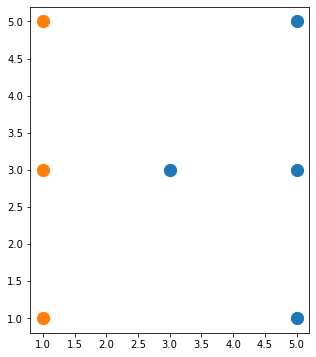

In [4]:
data_2 = np.flip(data_1, 0)

result = model.fit_predict(data_2)
clusters = np.unique(result)

plt.rcParams["figure.figsize"] = (5, 6)

for cluster in clusters:
    cluster_indexes = np.where(result == cluster)
    print(f'Cluster #{cluster}')
    print([(x, y) for x, y in data_2[cluster_indexes]])
    print()
    plt.scatter(data_2[cluster_indexes, 0], data_2[cluster_indexes, 1], s=150)

plt.show()

## Searching for a good value of the parameter ε

The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an "elbow": if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster.

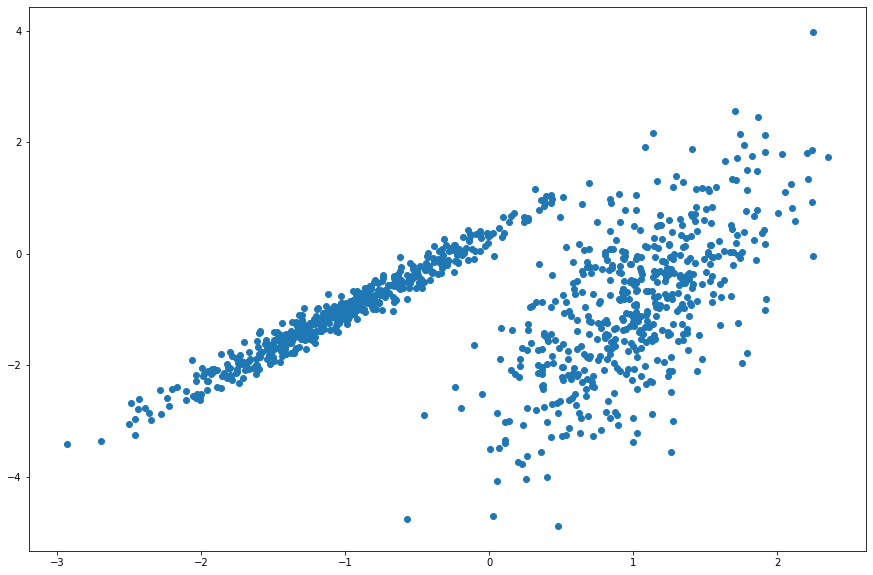

In [5]:
data, _ = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(data[:, 0], data[:, 1])

plt.show()

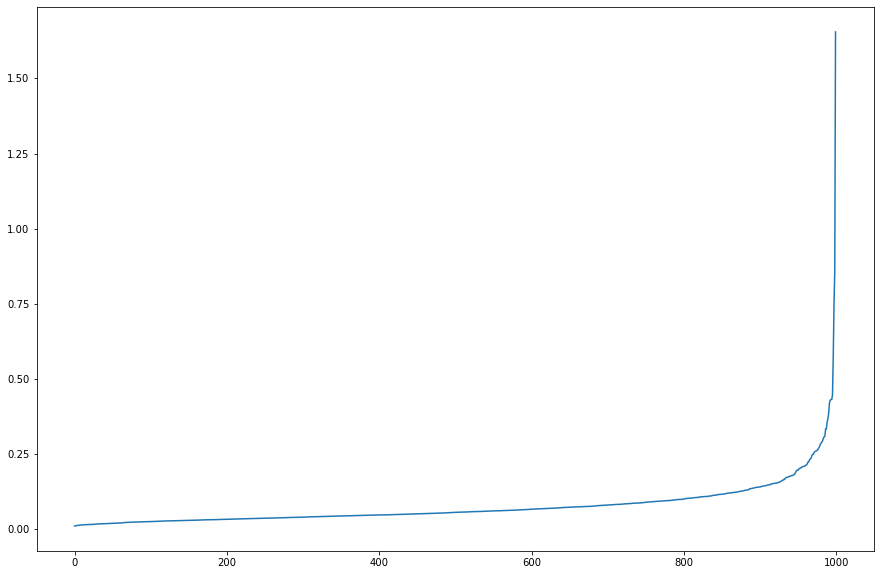

In [6]:
n_neighbors = 4

neighbors_model = sklearn.neighbors.NearestNeighbors(n_neighbors=n_neighbors)
result = neighbors_model.fit(data)
distances, _indices = result.kneighbors(data)

mean_distances = np.mean(distances[:, 1:n_neighbors], 1)
mean_distances = np.sort(mean_distances)

plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(mean_distances)
plt.show()

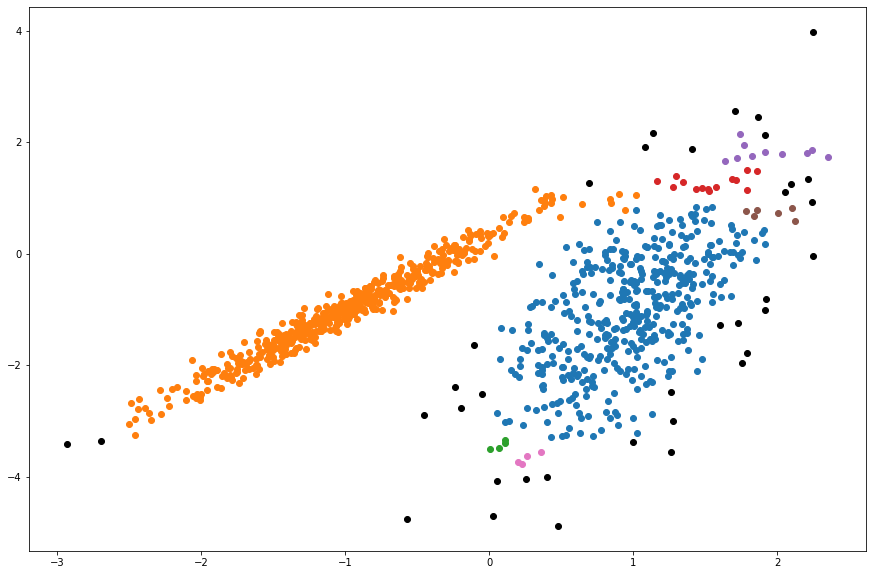

In [7]:
model = sklearn.cluster.DBSCAN(eps=0.222, min_samples=4)

result = model.fit_predict(data)

clusters = np.unique(result)

plt.rcParams["figure.figsize"] = (15, 10)

for cluster in clusters:
    color = (0, 0, 0, 1) if cluster == -1 else None
    cluster_indexes = np.where(result == cluster)
    plt.scatter(data[cluster_indexes, 0], data[cluster_indexes, 1], color=color)

plt.show()

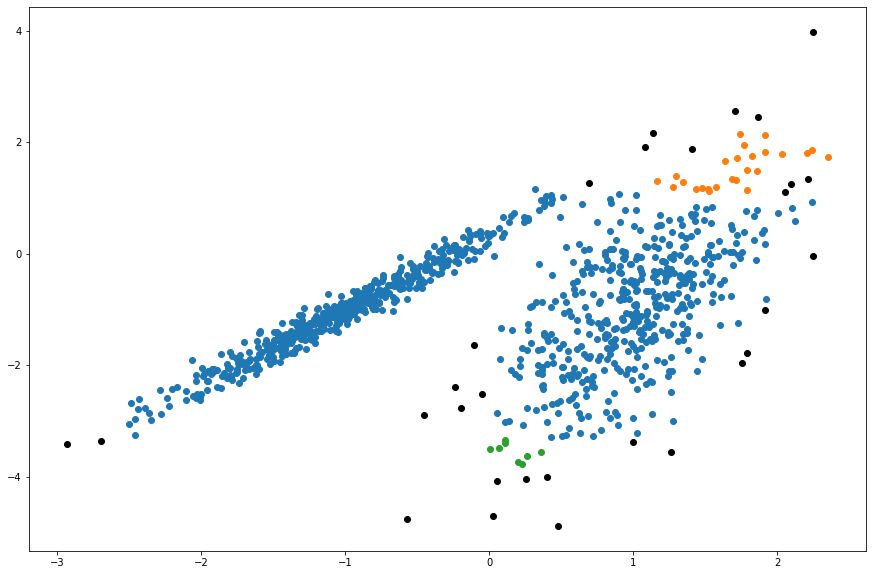

In [8]:
model = sklearn.cluster.DBSCAN(eps=0.25, min_samples=4)

result = model.fit_predict(data)

clusters = np.unique(result)

plt.rcParams["figure.figsize"] = (15, 10)

for cluster in clusters:
    color = (0, 0, 0, 1) if cluster == -1 else None
    cluster_indexes = np.where(result == cluster)
    plt.scatter(data[cluster_indexes, 0], data[cluster_indexes, 1], color=color)

plt.show()

## Comparing to K-means

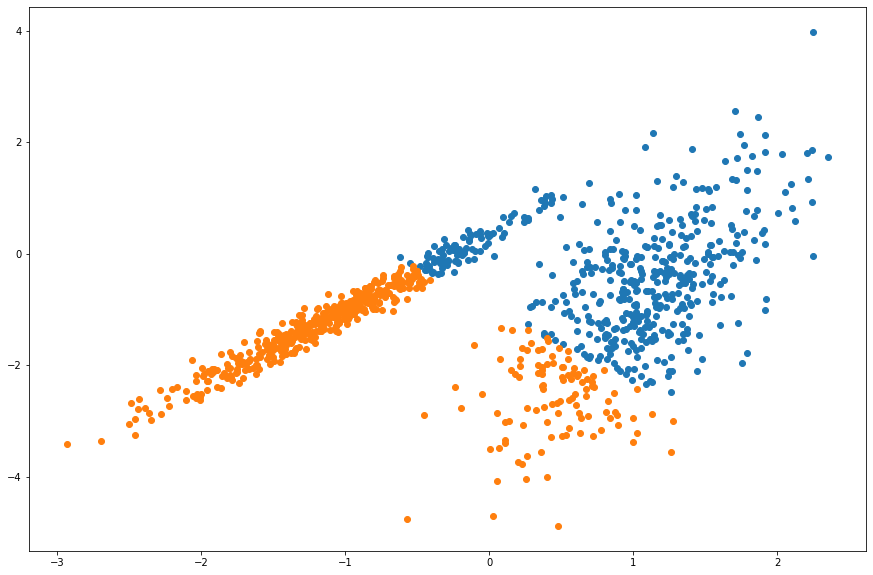

In [9]:
model = sklearn.cluster.KMeans(n_clusters=2)

model.fit(data)

result = model.predict(data)

clusters = np.unique(result)

plt.rcParams["figure.figsize"] = (15, 10)

for cluster in clusters:
	cluster_indexes = np.where(result == cluster)
	plt.scatter(data[cluster_indexes, 0], data[cluster_indexes, 1])

plt.show()

## Conclusions

- scikit-learn's implementation uses worst-case quadratic memory
- supports arbitrary Minkowski metrics

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


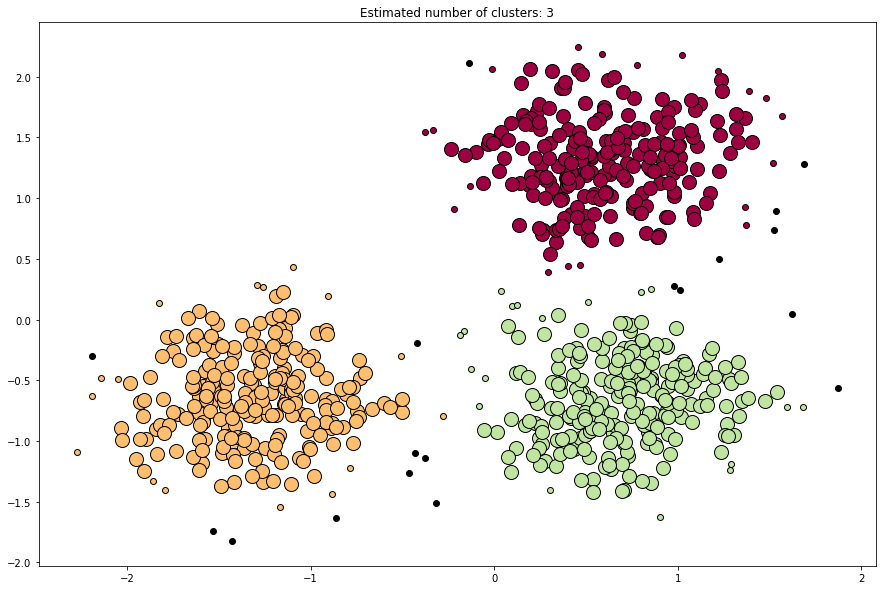

In [10]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = sklearn.datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = sklearn.preprocessing.StandardScaler().fit_transform(X)

db = sklearn.cluster.DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % sklearn.metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % sklearn.metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % sklearn.metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % sklearn.metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % sklearn.metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % sklearn.metrics.silhouette_score(X, labels))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.rcParams["figure.figsize"] = (15, 10)

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.show()